<a href="https://colab.research.google.com/github/Renato-55/FakeNewsDetection/blob/main/FakeNewsDetectionProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Load and store the dataset in the FakeNewsDetectionData 

In [9]:
# Can be necessary to download the latest version of matplot in order to use comands
#such as ax.bar_label
#!pip install seaborn --upgrade
#!pip install matplotlib --upgrade

#bert import
#!pip install tensorflow_text
#!pip install tf-models-official
#!pip install pytorch-pretrained-bert pytorch-nlp

In [10]:
#API Token
!echo '{"username":"renatobarbosa0707","key":"688080334f032395f65abb05549c245c"}' > ~/.kaggle/kaggle.json
!touch ~/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [11]:
#download fake news dataset from kaggle
!kaggle competitions download fake-news

 71% 33.0M/46.5M [00:00<00:00, 122MB/s] 
100% 46.5M/46.5M [00:00<00:00, 124MB/s]


In [12]:
#create new directory to store the dataset from kaggle
!mkdir FakeNewsDetectionData

mkdir: cannot create directory ‘FakeNewsDetectionData’: File exists


In [13]:
#unzip the data from source_path to target_path
!unzip "/content/fake-news.zip" -d "/content/FakeNewsDetectionData"

Archive:  /content/fake-news.zip
  inflating: /content/FakeNewsDetectionData/submit.csv  
  inflating: /content/FakeNewsDetectionData/test.csv  
  inflating: /content/FakeNewsDetectionData/train.csv  


In [14]:
#download emotions news dataset from kaggle
!kaggle competitions download -c tweet-sentiment-extraction

  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 90.3MB/s]


In [15]:
#create new directory to store the dataset from kaggle
!mkdir EmotionData

mkdir: cannot create directory ‘EmotionData’: File exists


In [16]:
#unzip the data from source_path to target_path
!unzip "/content/tweet-sentiment-extraction.zip" -d "/content/EmotionData"

Archive:  /content/tweet-sentiment-extraction.zip
  inflating: /content/EmotionData/sample_submission.csv  
  inflating: /content/EmotionData/test.csv  
  inflating: /content/EmotionData/train.csv  


# 2. Load data from the folder and make a simple analysis on the data

## Load and Data Prep (Data cleaning) on the fake news data set

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path_fakenews = "/content/FakeNewsDetectionData/"

#Load Data
train_data_fakenews = pd.read_csv(path_fakenews + "train.csv")
eval_data_x_fakenews = pd.read_csv(path_fakenews + "test.csv")
eval_data_y_fakenews = pd.read_csv(path_fakenews + "submit.csv")

Null values: 2554

The table id has 0
The table title has 558
The table author has 1957
The table text has 39
The table label has 0


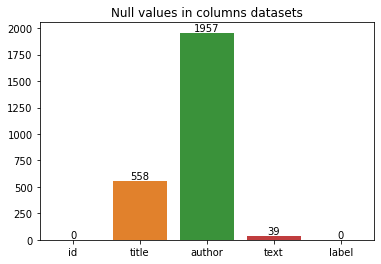

In [19]:
#data cleaning
null_val = train_data_fakenews.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data_fakenews:
  features.append(x)
  null_values_table.append(train_data_fakenews[x].isnull().sum())
  print(f"The table {x} has {train_data_fakenews[x].isnull().sum()}")
 
ax = sns.barplot(y=null_values_table,x=features)
ax.bar_label(ax.containers[0])
plt.title("Null values in columns datasets")
plt.show()

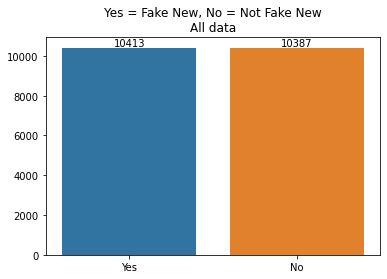

In [20]:
y = []
y.append(np.sum(train_data_fakenews['label'] == 1))
y.append(np.sum(train_data_fakenews['label'] == 0))

x = ['Yes','No']
ax = sns.barplot(x=x,y=y)
ax.bar_label(ax.containers[0])
plt.title("Yes = Fake New, No = Not Fake New\nAll data")
plt.show()

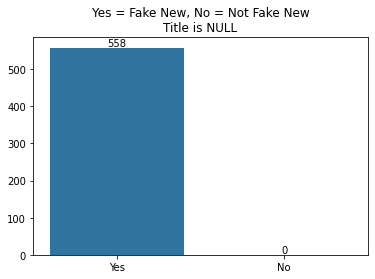

In [21]:
test = train_data_fakenews['title'].isnull() 
test = test.loc[test == True]
test = train_data_fakenews[train_data_fakenews.index.isin(test.index)]

y = []
y.append(np.sum(test['label'] == 1))
y.append(np.sum(test['label'] == 0))

x = ['Yes','No']
ax = sns.barplot(x=x,y=y)
ax.bar_label(ax.containers[0])
plt.title("Yes = Fake New, No = Not Fake New\nTitle is NULL")
plt.show()

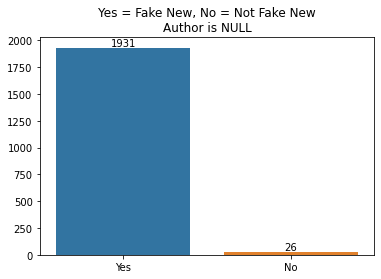

In [22]:
test = train_data_fakenews['author'].isnull() 
test = test.loc[test == True]
test = train_data_fakenews[train_data_fakenews.index.isin(test.index)]

y = []
y.append(np.sum(test['label'] == 1))
y.append(np.sum(test['label'] == 0))

x = ['Yes','No']
ax = sns.barplot(x=x,y=y)
ax.bar_label(ax.containers[0])
plt.title("Yes = Fake New, No = Not Fake New\nAuthor is NULL")
plt.show()

In [23]:
#i will change the null values in Author and Title to be unknown
#and i Will delete data where text is null
train_data_fakenews.text.dropna(inplace=True)
train_data_fakenews.fillna('UKN',inplace=True)

No null values

The table id has 0
The table title has 0
The table author has 0
The table text has 0
The table label has 0


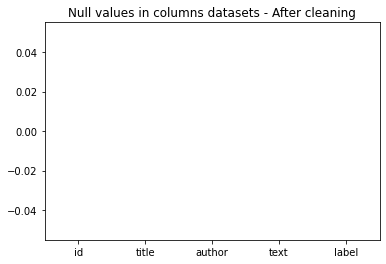

In [24]:
#data cleaning
null_val = train_data_fakenews.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data_fakenews:
  features.append(x)
  null_values_table.append(train_data_fakenews[x].isnull().sum())
  print(f"The table {x} has {train_data_fakenews[x].isnull().sum()}")
 
sns.barplot(y=null_values_table,x=features)
plt.title("Null values in columns datasets - After cleaning")
plt.show()

In [28]:
#initializing
train_data_fakenews_y = pd.DataFrame()
train_data_fakenews_x = pd.DataFrame()

val_data_fakenews_y = pd.DataFrame()
val_data_fakenews_x = pd.DataFrame()

#the last step is to join the 3 columns on the dataset
print(f"Shape of the training_data = {train_data_fakenews.shape}")
train_data_fakenews_y['label'] = train_data_fakenews['label']
train_data_fakenews_x['text'] = train_data_fakenews['author'] + ', ' + train_data_fakenews['title'] + ', ' + train_data_fakenews['text']

val_data_fakenews_y['label'] = eval_data_y_fakenews['label']
val_data_fakenews_x['text'] = eval_data_x_fakenews['author'] + ', ' + eval_data_x_fakenews['title'] + ', ' + eval_data_x_fakenews['text']

val_data_fakenews_x['text'] = val_data_fakenews_x['text'].astype('str')
print(f"Shape of the training_data x values = {train_data_fakenews_x.shape}")
print(f"Shape of the training_data y values = {train_data_fakenews_y.shape}")
print(f"Shape of the training_data x values = {val_data_fakenews_x.shape}")
print(f"Shape of the training_data y values = {val_data_fakenews_y.shape}")

Shape of the training_data = (20800, 5)
Shape of the training_data x values = (20800, 1)
Shape of the training_data y values = (20800, 1)
Shape of the training_data x values = (5200, 1)
Shape of the training_data y values = (5200, 1)


## Load and Data Prep (Data cleaning) on the emotions data set

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

#path to data
path_emotions = "/content/EmotionData/"

#Load Data
train_data_emotions = pd.read_csv(path_emotions+ "train.csv")
test_data_emotions =  pd.read_csv(path_emotions+ "test.csv")
#eval_data_emotions =  pd.read_csv(path_emotions+ "val.txt", names=['Text', 'Emotion'], sep=';')

### Remove null val and data analysis on train_data

Null values: 2

The table textID has 0
The table text has 1
The table selected_text has 1
The table sentiment has 0


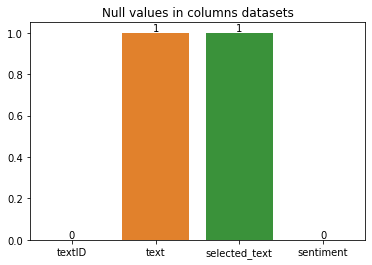

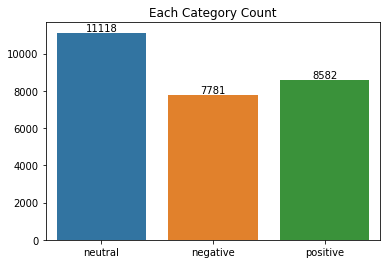

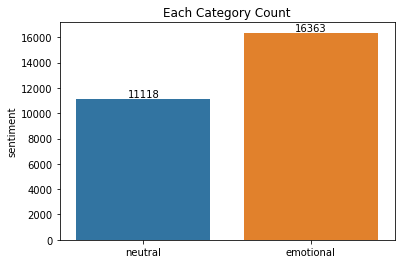

In [30]:
#data cleaning on train_data
null_val = train_data_emotions.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in train_data_emotions:
  features.append(x)
  null_values_table.append(train_data_emotions[x].isnull().sum())
  print(f"The table {x} has {train_data_emotions[x].isnull().sum()}")
 
ax = sns.barplot(y=null_values_table,x=features)
ax.bar_label(ax.containers[0])
plt.title("Null values in columns datasets")
plt.show()

#check how many times each emotion appers on the dataset
categorias_name = train_data_emotions.sentiment.unique()

categorias_count = []
for x in  categorias_name:
  counts = train_data_emotions.loc[train_data_emotions.sentiment == x]
  categorias_count.append(counts.shape[0])

ax = sns.barplot(x=categorias_name,y=categorias_count,data=train_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

def swapLabelEmotion(str):
  return 0 if str == 'neutral' else 1

#Change the label to 0 and 1
train_data_emotions['sentiment'] = train_data_emotions['sentiment'].map(lambda x:swapLabelEmotion(x))

#check how many times each emotion appers on the dataset
categorias_count = train_data_emotions.groupby('sentiment').sentiment.count()
categorias_name = ['neutral','emotional']

ax = sns.barplot(x=categorias_name,y=categorias_count,data=train_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

#i will drop the null value on the emotion dataset
train_data_emotions.dropna(inplace=True)

### Remove null val and data analysis on test_data

No null values

The table textID has 0
The table text has 0
The table sentiment has 0


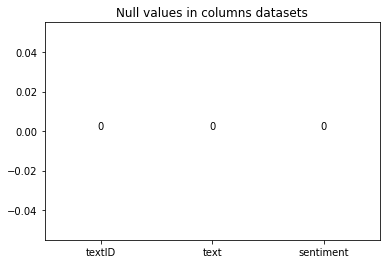

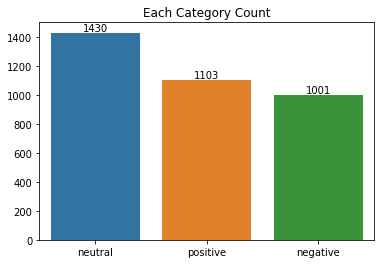

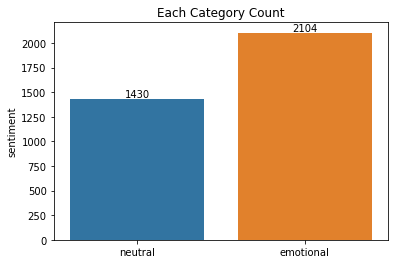

In [31]:
#data cleaning
null_val = test_data_emotions.isnull().sum().sum()

if null_val == 0:
  print("No null values\n")
else:
  print(f"Null values: {null_val}\n")

features = []
null_values_table = []
for x in test_data_emotions:
  features.append(x)
  null_values_table.append(test_data_emotions[x].isnull().sum())
  print(f"The table {x} has {test_data_emotions[x].isnull().sum()}")
 
ax = sns.barplot(y=null_values_table,x=features)
ax.bar_label(ax.containers[0])
plt.title("Null values in columns datasets")
plt.show()

#check how many times each emotion appers on the dataset
categorias_name = test_data_emotions.sentiment.unique()

categorias_count = []
for x in  categorias_name:
  counts = test_data_emotions.loc[test_data_emotions.sentiment == x]
  categorias_count.append(counts.shape[0])

ax = sns.barplot(x=categorias_name,y=categorias_count,data=test_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

def swapLabelEmotion(str):
  return 0 if str == 'neutral' else 1

#Change the label to 0 and 1
test_data_emotions['sentiment'] = test_data_emotions['sentiment'].map(lambda x:swapLabelEmotion(x))

#check how many times each emotion appers on the dataset
categorias_count = test_data_emotions.groupby('sentiment').sentiment.count()
categorias_name = ['neutral','emotional']

ax = sns.barplot(x=categorias_name,y=categorias_count,data=test_data_emotions)
ax.bar_label(ax.containers[0])
plt.title("Each Category Count")
plt.show()

#i will drop the null value on the emotion dataset
test_data_emotions.dropna(inplace=True)

# 3. Train the model whit the data provided

##   Bert Model to classify emotions - Data prep






In [33]:
import string
#I need to clean out the data from text
def removePunc(s):
  return s.translate(str.maketrans('', '', string.punctuation))

def removeWordsLessThan(sentence):
  spilted_sentence = sentence.split()
  new_str = []
  for s in spilted_sentence:
    if len(s) > 3:
      new_str.append(s)

  return " ".join(new_str)

################
##  Emotions  ## 
################
train_data_emotions['text'] = train_data_emotions['text'].map(lambda x:removeWordsLessThan(x))
train_data_emotions['text'] = train_data_emotions['text'].map(lambda x:removePunc(x))

test_data_emotions['text'] = test_data_emotions['text'].map(lambda x:removeWordsLessThan(x))
test_data_emotions['text'] = test_data_emotions['text'].map(lambda x:removePunc(x))

################
## Fake News  ## 
################
train_data_fakenews_x['text'] = train_data_fakenews_x['text'].map(lambda x:removeWordsLessThan(x))
train_data_fakenews_x['text'] = train_data_fakenews_x['text'].map(lambda x:removePunc(x))

val_data_fakenews_x['text'] = val_data_fakenews_x['text'].map(lambda x:removeWordsLessThan(x))
val_data_fakenews_x['text'] = val_data_fakenews_x['text'].map(lambda x:removePunc(x))

In [45]:
for x in train_data_fakenews_x['text']:
  print(x)
  

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [34]:
# BERT imports
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertAdam, BertForSequenceClassification
from tqdm import tqdm, trange
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# specify GPU device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()
#torch.cuda.get_device_name(0)

### Tokenizing the train_data_fakenews.text

In [35]:
# add special tokens for BERT to work properly
sentences__ = ["[CLS] " + query + " [SEP]" for query in train_data_fakenews_x.text]
print(sentences__[0])

# Tokenize with BERT tokenizer
tokenizer__ = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts__ = [tokenizer__.tokenize(sent) for sent in sentences__]
print ("Tokenize the first sentence:")
print (tokenized_texts__[0])

[CLS] Darrell Lucus House Aide Didn’t Even Comey’s Letter Until Jason Chaffetz Tweeted House Aide Didn’t Even Comey’s Letter Until Jason Chaffetz Tweeted Darrell Lucus October 2016 Subscribe Jason Chaffetz stump American Fork Utah image courtesy Michael Jolley available under Creative CommonsBY license With apologies Keith Olbermann there doubt Worst Person World this week–FBI Director James Comey according House Democratic aide looks like also know secondworst person well turns that when Comey sent nowinfamous letter announcing that looking into emails that related Hillary Clinton’s email server ranking Democrats relevant committees didn’t hear about from Comey They found tweet from Republican committee chairmen know Comey notified Republican chairmen Democratic ranking members House Intelligence Judiciary Oversight committees that agency reviewing emails recently discovered order they contained classified information long after this letter went out Oversight Committee Chairman Jason 

100%|██████████| 231508/231508 [00:00<00:00, 2363693.95B/s]


Tokenize the first sentence:
['[CLS]', 'darrell', 'luc', '##us', 'house', 'aide', 'didn', '’', 't', 'even', 'come', '##y', '’', 's', 'letter', 'until', 'jason', 'cha', '##ffe', '##tz', 't', '##wee', '##ted', 'house', 'aide', 'didn', '’', 't', 'even', 'come', '##y', '’', 's', 'letter', 'until', 'jason', 'cha', '##ffe', '##tz', 't', '##wee', '##ted', 'darrell', 'luc', '##us', 'october', '2016', 'sub', '##scribe', 'jason', 'cha', '##ffe', '##tz', 'stump', 'american', 'fork', 'utah', 'image', 'courtesy', 'michael', 'jo', '##lley', 'available', 'under', 'creative', 'commons', '##by', 'license', 'with', 'apologies', 'keith', 'ol', '##berman', '##n', 'there', 'doubt', 'worst', 'person', 'world', 'this', 'week', '–', 'fbi', 'director', 'james', 'come', '##y', 'according', 'house', 'democratic', 'aide', 'looks', 'like', 'also', 'know', 'second', '##wo', '##rst', 'person', 'well', 'turns', 'that', 'when', 'come', '##y', 'sent', 'now', '##in', '##fa', '##mous', 'letter', 'announcing', 'that', 'lo

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids_fake_news_train = pad_sequences([tokenizer__.convert_tokens_to_ids(txt) for txt in tokenized_texts__],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_fake_news_train = [tokenizer__.convert_tokens_to_ids(x) for x in tokenized_texts__]

input_ids_fake_news_train = pad_sequences(input_ids_fake_news_train, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

### Tokenizing the val_data_fakenews.text

In [ ]:
# add special tokens for BERT to work properly
_sentences__ = ["[CLS] " + query + " [SEP]" for query in val_data_fakenews_x.text]
print(_sentences__[0])

# Tokenize with BERT tokenizer
_tokenizer__ = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
_tokenized_texts__ = [_tokenizer__.tokenize(sent) for sent in _sentences__]
print ("Tokenize the first sentence:")
print (_tokenized_texts__[0])

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids_fake_news_val = pad_sequences([_tokenizer__.convert_tokens_to_ids(txt) for txt in _tokenized_texts__],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_fake_news_val = [_tokenizer__.convert_tokens_to_ids(x) for x in _tokenized_texts__]

input_ids_fake_news_val = pad_sequences(input_ids_fake_news_val, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

### Tokenizing the train_data_emotions.text

In [ ]:
# add special tokens for BERT to work properly
sentences = ["[CLS] " + query + " [SEP]" for query in train_data_emotions.text]
print(sentences[0])

# Tokenize with BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts = [tokenizer.tokenize(sent) for sent in sentences]
print ("Tokenize the first sentence:")
print (tokenized_texts[0])

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids_train_emotions = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_train_emotions = [tokenizer.convert_tokens_to_ids(x) for x in tokenized_texts]

input_ids_train_emotions = pad_sequences(input_ids_train_emotions, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

### Tokenizing the test_data_emotion.text

In [ ]:
# add special tokens for BERT to work properly
sentences_ = ["[CLS] " + query + " [SEP]" for query in test_data_emotions.text]
print(sentences_[0])

# Tokenize with BERT tokenizer
tokenizer_ = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
tokenized_texts_ = [tokenizer_.tokenize(sent) for sent in sentences_]
print ("Tokenize the first sentence:")
print (tokenized_texts_[0])

In [ ]:
# Set the maximum sequence length. 
MAX_LEN = 128
# Pad our input tokens
input_ids_val_emotions = pad_sequences([tokenizer_.convert_tokens_to_ids(txt) for txt in tokenized_texts_],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

# Use the BERT tokenizer to convert the tokens to their index numbers in the BERT vocabulary
input_ids_val_emotions = [tokenizer_.convert_tokens_to_ids(x) for x in tokenized_texts_]

input_ids_val_emotions = pad_sequences(input_ids_val_emotions, maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

##   Bert Model to classify emotions - Keras






In [ ]:
import os
import shutil

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

AUTOTUNE = tf.data.AUTOTUNE
batch_size = 32
seed = 42

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

In [ ]:
vocab_size = 30000
embed_dim = 256
num_heads = 2
dense_dim = 32

inputs = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(vocab_size, embed_dim)(inputs)
x = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)
x = layers.GlobalMaxPooling1D()(x)
# variar a partir daqui
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(512, activation="relu")(x)
#######################
outputs = layers.Dense(1, activation="sigmoid")(x)

In [ ]:
model_emotions = keras.Model(inputs, outputs)
model_emotions.compile(optimizer="rmsprop",
              #loss="categorical_crossentropy",
              loss="mean_squared_error",
              metrics=["accuracy"])
model_emotions.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint( filepath="/content/bert_emotions.keras",
                                    save_best_only=True)
]

y =  train_data_emotions['sentiment']
y2 =  test_data_emotions['sentiment']

history = model_emotions.fit(input_ids_train_emotions,y, epochs=20, callbacks=callbacks, validation_data=(input_ids_val_emotions, y2))

model_emotions = keras.models.load_model(
    filepath="/content/bert_emotions.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder})

In [ ]:
model_fake = keras.Model(inputs, outputs)
model_fake.compile(optimizer="rmsprop",
              #loss="categorical_crossentropy",
              loss="mean_squared_error",
              metrics=["accuracy"])
model_fake.summary()

callbacks = [
    keras.callbacks.ModelCheckpoint( filepath="/content/bert_fake.keras",
                                    save_best_only=True)
]

history = model_fake.fit(input_ids_fake_news_train,train_data_fakenews_y, epochs=20, callbacks=callbacks, validation_data=(input_ids_fake_news_train, val_data_fakenews_y))

model_fake = keras.models.load_model(
    filepath="/content/bert_fake.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder})